In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

In [5]:
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\SMSSpamCollection",sep='\t',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
xtrainraw,xtestraw,ytrainraw,ytestraw=train_test_split(df.iloc[:,1],df.iloc[:,0],random_state=50)
print(xtrainraw.shape)
print(xtestraw.shape)

(4179,)
(1393,)


In [7]:
vectorizer=TfidfVectorizer()
xtrain=vectorizer.fit_transform(xtrainraw)
xtest=vectorizer.transform(xtestraw)
print(xtrain.shape)
print(xtest.shape)

(4179, 7380)
(1393, 7380)


In [8]:
classifier=LogisticRegression()
classifier.fit(xtrain,ytrainraw)

LogisticRegression()

In [11]:
prediction=classifier.predict(xtest)
prediction

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [13]:
pred_proba=classifier.predict_proba(xtest)
pred_proba

array([[0.10033611, 0.89966389],
       [0.92036594, 0.07963406],
       [0.94291403, 0.05708597],
       ...,
       [0.82269104, 0.17730896],
       [0.97434695, 0.02565305],
       [0.98669776, 0.01330224]])

In [14]:
fpr,tpr,threshold=roc_curve(ytestraw,pred_proba[:,1],pos_label='spam')

In [16]:
print(fpr)
print(tpr)
print(threshold)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.21692687e-04
 8.21692687e-04 1.64338537e-03 1.64338537e-03 1.64338537e-03
 1.64338537e-03 1.64338537e-03 1.64338537e-03 2.46507806e-03
 2.46507806e-03 3.28677075e-03 3.28677075e-03 5.75184881e-03
 6.57354150e-03 6.57354150e-03 8.21692687e-03 8.21692687e-03
 8.21692687e-03 9.86031224e-03 9.86031224e-03 1.15036976e-02
 1.15036976e-02 1.47904684e-02 1.47904684e-02 1.56121611e-02
 1.72555464e-02 1.13393591e-01 1.16680362e-01 1.42152835e-01
 1.43796220e-01 1.61873459e-01 1.65160230e-01 2.38290879e-01
 2.39934265e-01 2.72801972e-01 2.74445357e-01 2.76088743e-01
 2.76088743e-01 3.48397699e-01 3.50041085e-01 3.53327855e-01
 3.53327855e-01 4.24815119e-01 4.27280197e-01 4.85620378e-01
 4.87263763e-01 5.07806081e-01 5.12736237e-01 5.43138866e-01
 5.43138866e-01 6.43385374e-01 6.45028759e-01 6.68857847e-01
 6.70501233e-01 7.189811

In [17]:
area_=auc(fpr,tpr)
area_

0.987338462687682

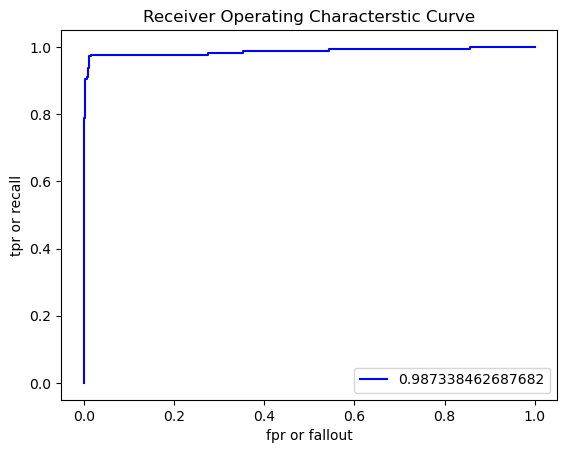

In [19]:
plt.title('Receiver Operating Characterstic Curve')
plt.plot(fpr,tpr,'b',label=area_)
plt.legend(loc='lower right')
plt.xlabel('fpr or fallout')
plt.ylabel('tpr or recall')
plt.show()

In [21]:
print(len(fpr))

82
